### Import Libraries and Settings

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:.5f}'.format

In [3]:
import psutil
free = psutil.virtual_memory().free / (1024.0 ** 3)
used = psutil.virtual_memory().used / (1024.0 ** 3)
total = psutil.virtual_memory().total / (1024.0 ** 3)
print(total,used,free)
print(psutil.virtual_memory().percent,'%')

15.676994323730469 9.153179168701172 6.526268005371094
58.4 %


In [4]:
import sys
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('open', 160),
 ('go', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('px', 72),
 ('sm', 72),
 ('sns', 72),
 ('st', 72),
 ('free', 24),
 ('total', 24),
 ('used', 24)]

### Data Loading

In [5]:
df1 = pd.read_csv("Dataset//yellow_tripdata_2016-01.csv")
df1.shape

(10906858, 19)

In [6]:
df2 = pd.read_csv("Dataset//yellow_tripdata_2016-02.csv")
df2.shape

(11382049, 19)

In [7]:
df3 = pd.read_csv("Dataset//yellow_tripdata_2016-03.csv")
df3.shape

(12210952, 19)

In [8]:
df1.shape[0]+df2.shape[0]+df3.shape[0]

34499859

In [9]:
pd.concat([df1.head(),df1.tail(),df2.head(),df2.tail(),df3.head(),df3.tail()])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10000,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.50000,0.50000,0.50000,0.00000,0.00000,0.30000,8.80000
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90000,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.00000,0.50000,0.50000,0.00000,0.00000,0.30000,19.30000
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54000,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.00000,0.50000,0.50000,0.00000,0.00000,0.30000,34.30000
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75000,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.50000,0.00000,0.50000,0.00000,0.00000,0.30000,17.30000
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76000,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.00000,0.00000,0.50000,0.00000,0.00000,0.30000,8.80000
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20000,-74.00358,40.75101,1,N,-73.98265,40.76751,2,8.50000,0.50000,0.50000,0.00000,0.00000,0.30000,9.80000
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00000,-73.94549,40.75153,1,N,-73.94546,40.75153,2,2.50000,0.50000,0.50000,0.00000,0.00000,0.30000,3.80000
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40000,-73.99424,40.76659,1,N,-73.98443,40.75392,2,7.50000,0.50000,0.50000,0.00000,0.00000,0.30000,8.80000
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10000,-73.94807,40.77653,1,N,-73.97819,40.77744,1,11.50000,0.00000,0.50000,2.45000,0.00000,0.30000,14.75000
10906857,1,2016-01-05 06:15:21,2016-01-05 06:15:36,3,0.00000,-73.96094,40.75859,2,N,-73.96101,40.75858,2,52.00000,0.00000,0.50000,0.00000,5.54000,0.30000,58.34000


### Data Cleaning & Preprocessing

##### Understanding Data

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11382049 entries, 0 to 11382048
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.6+ GB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [13]:
df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [14]:
df2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [15]:
df3.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [16]:
df1.nunique()

VendorID                       2
tpep_pickup_datetime     2368616
tpep_dropoff_datetime    2372528
passenger_count               10
trip_distance               4513
pickup_longitude           35075
pickup_latitude            62184
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          53813
dropoff_latitude           87358
payment_type                   5
fare_amount                 1878
extra                         35
mta_tax                       16
tip_amount                  3551
tolls_amount                 940
improvement_surcharge          7
total_amount               11166
dtype: int64

In [17]:
df2.nunique()

VendorID                       2
tpep_pickup_datetime     2299494
tpep_dropoff_datetime    2302713
passenger_count               10
trip_distance               4397
pickup_longitude           34366
pickup_latitude            61614
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          53571
dropoff_latitude           87448
payment_type                   4
fare_amount                 1770
extra                         53
mta_tax                       19
tip_amount                  3486
tolls_amount                 956
improvement_surcharge          8
total_amount               11013
dtype: int64

In [18]:
df3.nunique()

VendorID                       2
tpep_pickup_datetime     2462580
tpep_dropoff_datetime    2466342
passenger_count               10
trip_distance               4501
pickup_longitude           35194
pickup_latitude            62643
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          54703
dropoff_latitude           88408
payment_type                   4
fare_amount                 1914
extra                         45
mta_tax                       16
tip_amount                  3561
tolls_amount                 995
improvement_surcharge         10
total_amount               11408
dtype: int64

##### Data Filtering

In [19]:
df1 = df1[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]
df2 = df2[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]
df3 = df3[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]

df1.shape, df2.shape, df3.shape

((10906858, 12), (11382049, 12), (12210952, 12))

In [20]:
df_main = pd.concat([df1,df2,df3])
df_main.shape

(34499859, 12)

In [21]:
df_main.reset_index(drop=True, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499859 entries, 0 to 34499858
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_latitude        float64
 6   pickup_longitude       float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   payment_type           int64  
 10  fare_amount            float64
 11  total_amount           float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.1+ GB


In [22]:
#df_main.to_csv('Dataset//2016Q1TaxiTripData.csv', index=False)

In [23]:
df_main.VendorID.value_counts().sort_index()

VendorID
1    16126062
2    18373797
Name: count, dtype: int64

In [24]:
df_main['tpep_pickup_datetime'] = pd.to_datetime(df_main['tpep_pickup_datetime'])
df_main['tpep_dropoff_datetime'] = pd.to_datetime(df_main['tpep_dropoff_datetime'])

print(
df_main.tpep_pickup_datetime.min()," ", df_main.tpep_pickup_datetime.max(),'\n',
df_main.tpep_dropoff_datetime.min()," ", df_main.tpep_dropoff_datetime.max(),sep='')

2016-01-01 00:00:00 2016-03-31 23:59:59
2015-02-07 15:35:25 2016-06-29 15:58:16


In [25]:
df_main['duration'] = df_main['tpep_dropoff_datetime'] - df_main['tpep_pickup_datetime']
df_main['duration'] = df_main['duration'].dt.total_seconds()/60

df_main.duration.min(), df_main.duration.max()

(np.float64(-537100.0666666667), np.float64(192313.38333333333))

In [26]:
df_main.passenger_count.value_counts(normalize=True).sort_index()

passenger_count
0   0.00005
1   0.71142
2   0.14217
3   0.04011
4   0.01908
5   0.05374
6   0.03343
7   0.00000
8   0.00000
9   0.00000
Name: proportion, dtype: float64

In [27]:
df_main = df_main[(df_main['passenger_count']>0)&(df_main['passenger_count']<7)]

In [28]:
df_main.trip_distance.min(), df_main.trip_distance.max()

(np.float64(-3390583.8), np.float64(19072628.8))

In [29]:
df_main.RatecodeID.value_counts().sort_index()

RatecodeID
1     33626878
2       697589
3        56164
4        14459
5       101996
6          320
99         607
Name: count, dtype: int64

In [30]:
df_main = df_main[df_main['RatecodeID']<=6]

In [31]:
df_main.store_and_fwd_flag.value_counts().sort_index()

store_and_fwd_flag
N    34302144
Y      195262
Name: count, dtype: int64

In [32]:
df_main['store_and_fwd_flag'] = df_main['store_and_fwd_flag'].replace(['N','Y'],[0,1])
df_main['store_and_fwd_flag'] = df_main['store_and_fwd_flag'].astype('int64')

In [33]:
df_main.payment_type.value_counts().sort_index()

payment_type
1    22987773
2    11340298
3      125327
4       44007
5           1
Name: count, dtype: int64

In [34]:
df_main = df_main[df_main['payment_type'].isin([1,2])]
#df_main['payment_type'] = df_main['payment_type'].replace([1,2],['Card','Cash'])

In [35]:
print(
df_main.fare_amount.min()," ", df_main.fare_amount.max(),'\n',
df_main.total_amount.min()," ", df_main.total_amount.max(),sep='')

-376.0 429496.72
-376.3 429562.25


In [36]:
df_main.reset_index(drop=True, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328071 entries, 0 to 34328070
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_latitude        float64       
 6   pickup_longitude       float64       
 7   RatecodeID             int64         
 8   store_and_fwd_flag     int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  total_amount           float64       
 12  duration               float64       
dtypes: datetime64[ns](2), float64(6), int64(5)
memory usage: 3.3 GB


In [37]:
df_main.sample(1000).sort_index()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_latitude,pickup_longitude,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,total_amount,duration
48500,2,2016-01-01 00:25:07,2016-01-01 00:54:09,1,6.64000,40.79476,-73.97237,1,0,1,25.00000,31.56000,29.03333
101449,1,2016-01-01 02:13:24,2016-01-01 02:21:12,1,2.20000,40.75048,-73.99522,1,0,2,8.50000,9.80000,7.80000
147724,2,2016-01-01 03:46:46,2016-01-01 03:58:12,1,1.81000,40.83031,-73.94779,1,0,2,10.00000,11.30000,11.43333
292791,2,2016-01-01 16:52:26,2016-01-01 16:59:24,1,1.78000,40.76252,-73.92937,1,0,1,8.00000,11.00000,6.96667
320220,1,2016-01-01 18:32:59,2016-01-01 18:41:05,1,2.70000,40.79185,-73.97285,1,0,1,9.50000,12.35000,8.10000
436722,1,2016-01-02 10:24:02,2016-01-02 10:27:15,2,0.70000,40.77361,-73.95983,1,0,1,4.50000,6.36000,3.21667
462244,2,2016-01-02 12:08:52,2016-01-02 12:23:36,4,1.89000,40.72084,-74.00417,1,0,2,11.00000,11.80000,14.73333
472756,1,2016-01-02 12:46:25,2016-01-02 12:57:33,3,1.60000,40.75279,-73.99317,1,0,2,9.00000,9.80000,11.13333
606551,1,2016-01-02 22:03:42,2016-01-02 22:23:15,2,4.90000,40.72609,-74.00256,1,0,1,18.00000,29.79000,19.55000
609776,2,2016-01-02 22:13:33,2016-01-02 22:29:40,1,3.03000,40.72455,-73.98768,1,0,1,13.00000,17.88000,16.11667


##### Noise Reduction

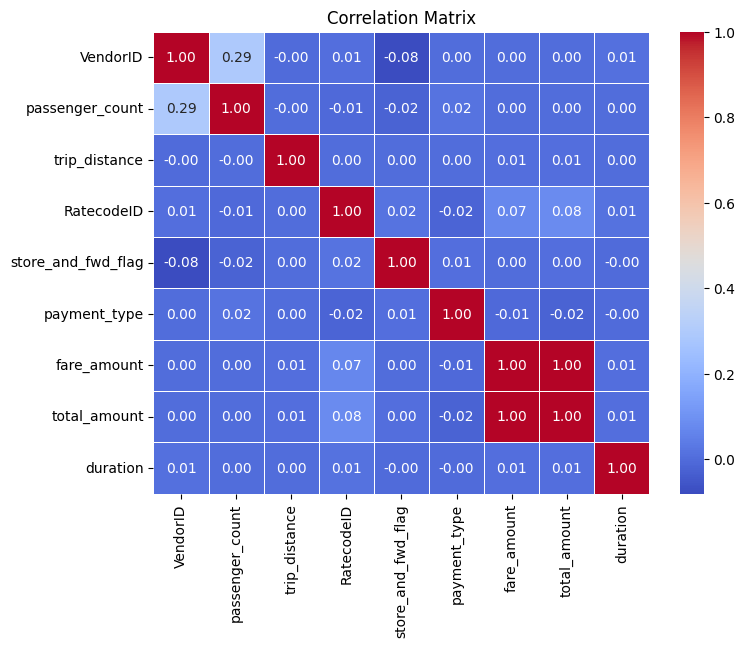

In [38]:
corr_matrix = df_main[['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount','duration']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [39]:
df_main = df_main[['passenger_count','trip_distance','payment_type','pickup_latitude','pickup_longitude','total_amount','duration']]
df_main.shape

(34328071, 7)

In [40]:
df_main.duplicated().value_counts()

False    34224510
True       103561
Name: count, dtype: int64

In [41]:
df_main.drop_duplicates(keep='first', inplace=True)
df_main.shape

(34224510, 7)

In [42]:
df_main.describe()

,passenger_count,trip_distance,payment_type,pickup_latitude,pickup_longitude,total_amount,duration
count,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000
mean,1.66526,5.08240,1.32988,40.25048,-73.06528,15.78538,15.54709
std,1.31931,4592.67823,0.47017,4.48879,8.14848,85.93051,203.00339
min,1.00000,-3390583.80000,1.00000,-77.03949,-161.69867,-376.30000,-537100.06667
25%,1.00000,1.00000,1.00000,40.73663,-73.99168,8.30000,6.45000
50%,1.00000,1.70000,1.00000,40.75357,-73.98159,11.76000,10.68333
75%,2.00000,3.10000,2.00000,40.76794,-73.96680,17.30000,17.20000
max,6.00000,19072628.80000,2.00000,66.85682,94.64387,429562.25000,192313.38333


In [43]:
df_main = df_main[df_main['trip_distance']>0]
#df_main = df_main[df_main['fare_amount']>0]
df_main = df_main[df_main['total_amount']>0]
df_main = df_main[df_main['duration']>0]

In [44]:
df_main.shape

(34069975, 7)

In [45]:
def remove_outliers(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        
        df = df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]
        
    return df

In [46]:
df_main = remove_outliers(df_main,['trip_distance','total_amount','duration'])
df_main.shape

(29002628, 7)

In [47]:
del df1,df2,df3,corr_matrix

In [49]:
#df_main.to_csv('Dataset//2016Q1ModellingData.csv', index=False)

### Data Visualization

In [5]:
df_main=pd.read_csv('Dataset//2016Q1ModellingData.csv')
df_main.shape
# (29002628, 7)

(29002628, 7)

In [6]:
sample_df = df_main.sample(n=100000, random_state=42)

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 12674251 to 18568509
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   passenger_count   100000 non-null  int64  
 1   trip_distance     100000 non-null  float64
 2   payment_type      100000 non-null  int64  
 3   pickup_latitude   100000 non-null  float64
 4   pickup_longitude  100000 non-null  float64
 5   total_amount      100000 non-null  float64
 6   duration          100000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.1 MB


In [7]:
df_main.groupby('payment_type').agg({'payment_type':['count'], 'total_amount':['mean','std'], 'trip_distance':['mean','std'], 'duration':['mean','std']}).reset_index()

payment_type           total_amount         trip_distance         duration  \
                   count         mean     std          mean     std     mean   
0            1  19105046     12.32003 4.42027       1.81514 1.13155 10.54879   
1            2   9897582      9.89647 3.96141       1.68039 1.18080  9.87400   

           
      std  
0 5.49170  
1 5.69244

In [8]:
sample_df.groupby('payment_type').agg({'payment_type':['count'], 'total_amount':['mean','std'], 'trip_distance':['mean','std'], 'duration':['mean','std']}).reset_index()

payment_type        total_amount         trip_distance         duration  \
                count         mean     std          mean     std     mean   
0            1  65552     12.33965 4.41878       1.82085 1.13268 10.56648   
1            2  34448      9.88786 3.97596       1.67987 1.18938  9.85593   

           
      std  
0 5.49903  
1 5.68239

In [9]:
sample_df['payment_type'] = sample_df['payment_type'].replace(['Card','Cash'],[1,2])

In [10]:
corr_matrix = sample_df.corr()
corr_with_target = corr_matrix['total_amount']

k = 5
top_k = corr_with_target.abs().sort_values(ascending=False)[:k].index
selected_features = sample_df[top_k]

selected_corr_matrix = selected_features.corr()
selected_corr_matrix

,total_amount,duration,trip_distance,payment_type,pickup_latitude
total_amount,1.00000,0.89400,0.88002,-0.26315,-0.01234
duration,0.89400,1.00000,0.71492,-0.06059,-0.01009
trip_distance,0.88002,0.71492,1.00000,-0.05803,-0.01170
payment_type,-0.26315,-0.06059,-0.05803,1.00000,0.01076
pickup_latitude,-0.01234,-0.01009,-0.01170,0.01076,1.00000


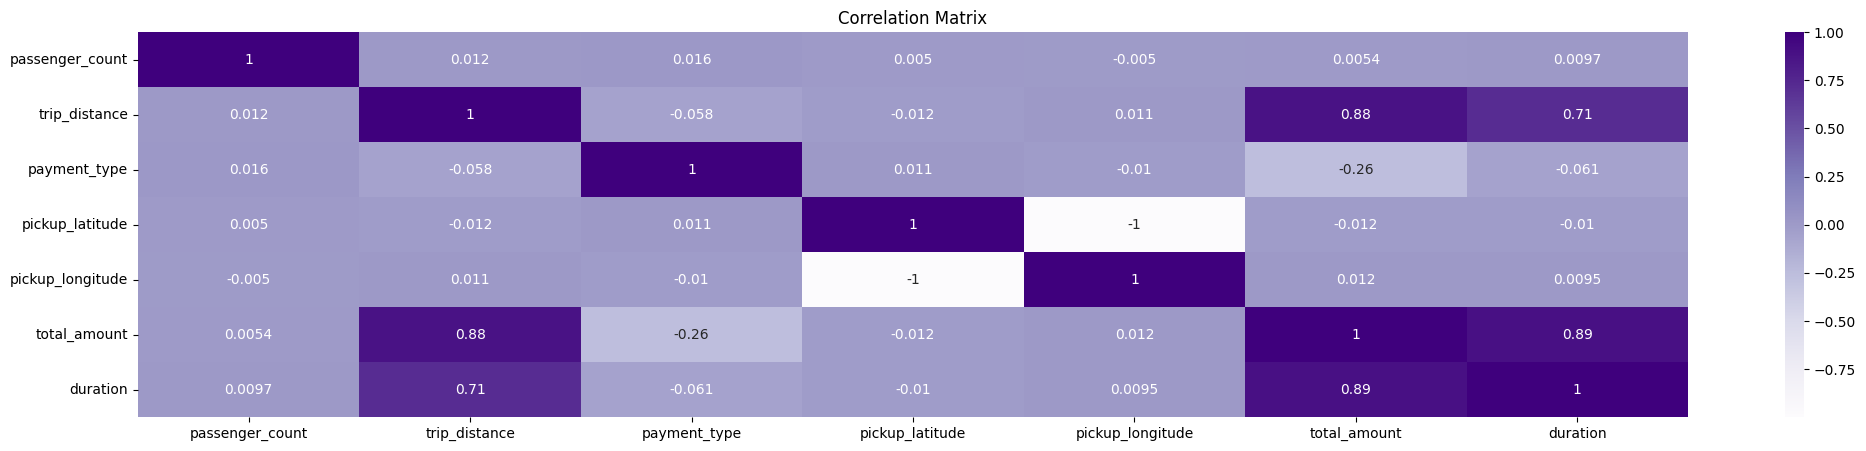

In [11]:
#!pip install seaborn --upgrade

corr_matrix = sample_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()

In [12]:
sample_df['payment_type'] = sample_df['payment_type'].replace([1,2],['Card','Cash'])

In [13]:
card_color = '#66c2a5'#'#3b528b'
cash_color = '#fc8d62'#'#21918c'

In [14]:
#df_main[df_main['trip_distance']>15].sort_values(by=['payment_type','total_amount'])

#df_main[df_main['total_amount']<df_main['trip_distance']].sort_values(by=['payment_type','total_amount'])

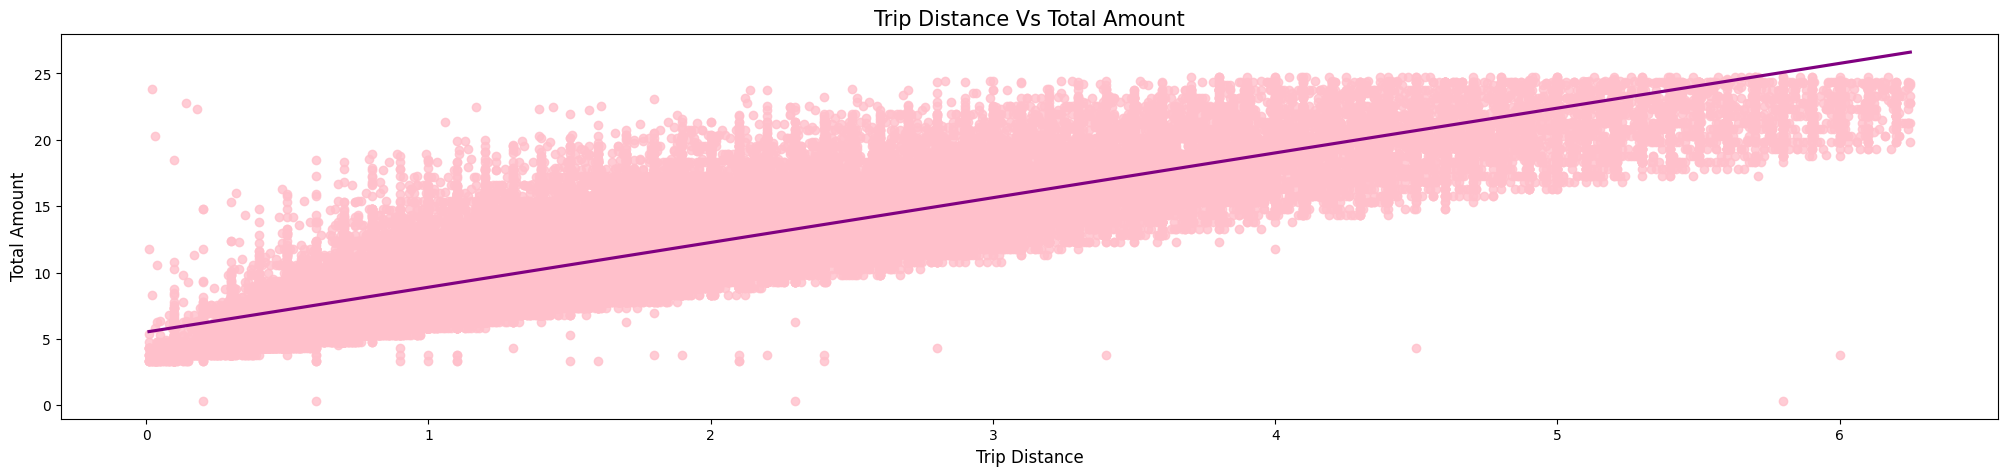

In [15]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

#sns.scatterplot(data=sample_df, x="trip_distance", y="total_amount", hue="payment_type")
sns.regplot(data=sample_df, x="trip_distance", y="total_amount", scatter_kws={"color": "pink"}, line_kws={"color": "Purple"})
#sns.lmplot(data=sample_df, x="trip_distance", y="total_amount", hue="payment_type", markers=["o", "s"], palette="coolwarm")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Trip Distance', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Trip Distance Vs Total Amount', fontsize=15)
#plt.legend(fontsize=10)
plt.show()

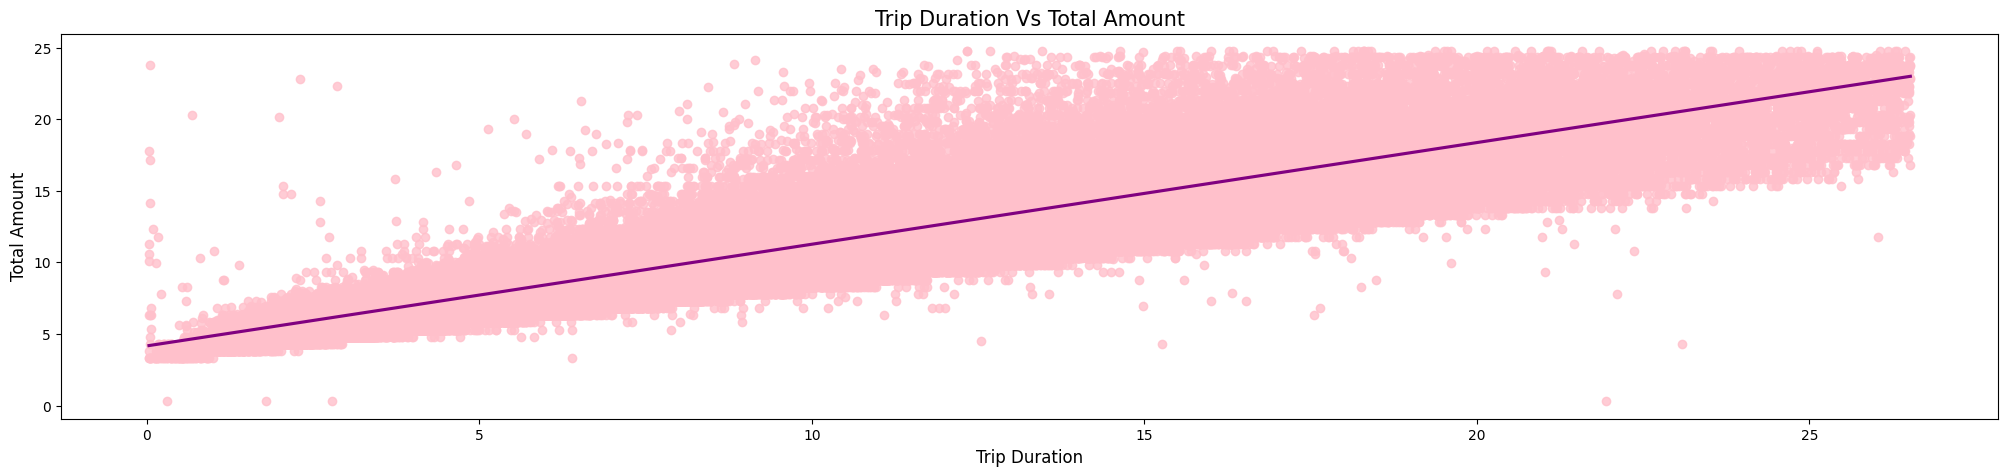

In [16]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

#sns.scatterplot(data=sample_df, x="trip_distance", y="total_amount", hue="payment_type")
sns.regplot(data=sample_df, x="duration", y="total_amount", scatter_kws={"color": "pink"}, line_kws={"color": "Purple"})
#sns.lmplot(data=sample_df, x="trip_distance", y="total_amount", hue="payment_type", markers=["o", "s"], palette="coolwarm")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Trip Duration', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Trip Duration Vs Total Amount', fontsize=15)
#plt.legend(fontsize=10)
plt.show()

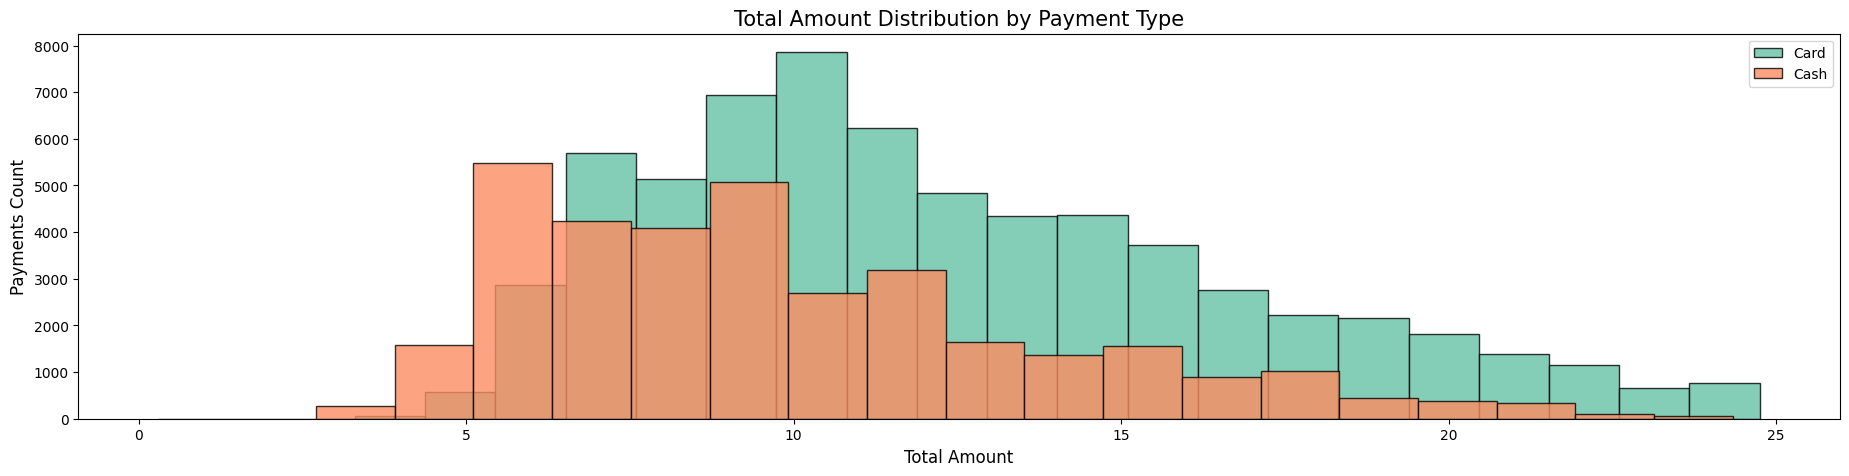

In [17]:
plt.figure(figsize=(50,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain')

plt.hist(sample_df[sample_df['payment_type']=='Card']['total_amount'], histtype='barstacked',bins=20,color=card_color,alpha=0.8,edgecolor='black',label='Card')
plt.hist(sample_df[sample_df['payment_type']=='Cash']['total_amount'], histtype='barstacked',bins=20,color=cash_color,alpha=0.8,edgecolor='black',label='Cash')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Payments Count', fontsize=12)
plt.title('Total Amount Distribution by Payment Type', fontsize=15)
plt.legend()
plt.show()

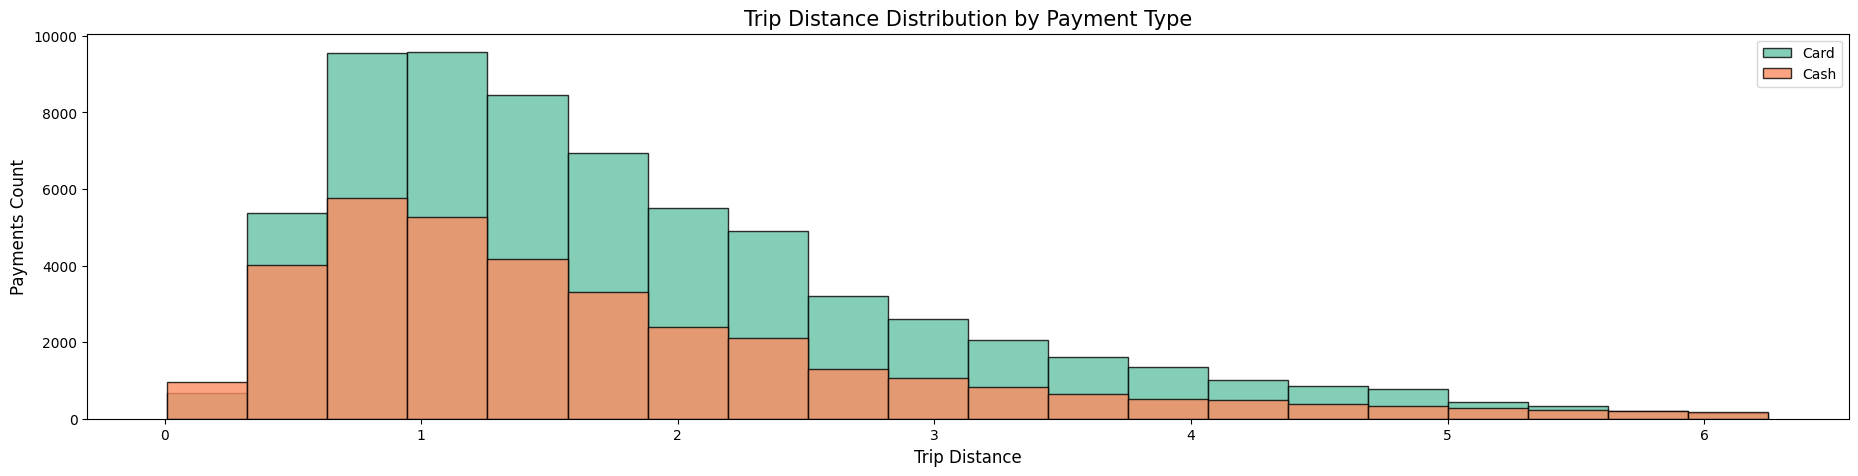

In [18]:
plt.figure(figsize=(50,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain')

plt.hist(sample_df[sample_df['payment_type']=='Card']['trip_distance'], histtype='barstacked',bins=20,color=card_color,alpha=0.8,edgecolor='black',label='Card')
plt.hist(sample_df[sample_df['payment_type']=='Cash']['trip_distance'], histtype='barstacked',bins=20,color=cash_color,alpha=0.8,edgecolor='black',label='Cash')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Trip Distance', fontsize=12)
plt.ylabel('Payments Count', fontsize=12)
plt.title('Trip Distance Distribution by Payment Type', fontsize=15)
plt.legend()
plt.show()

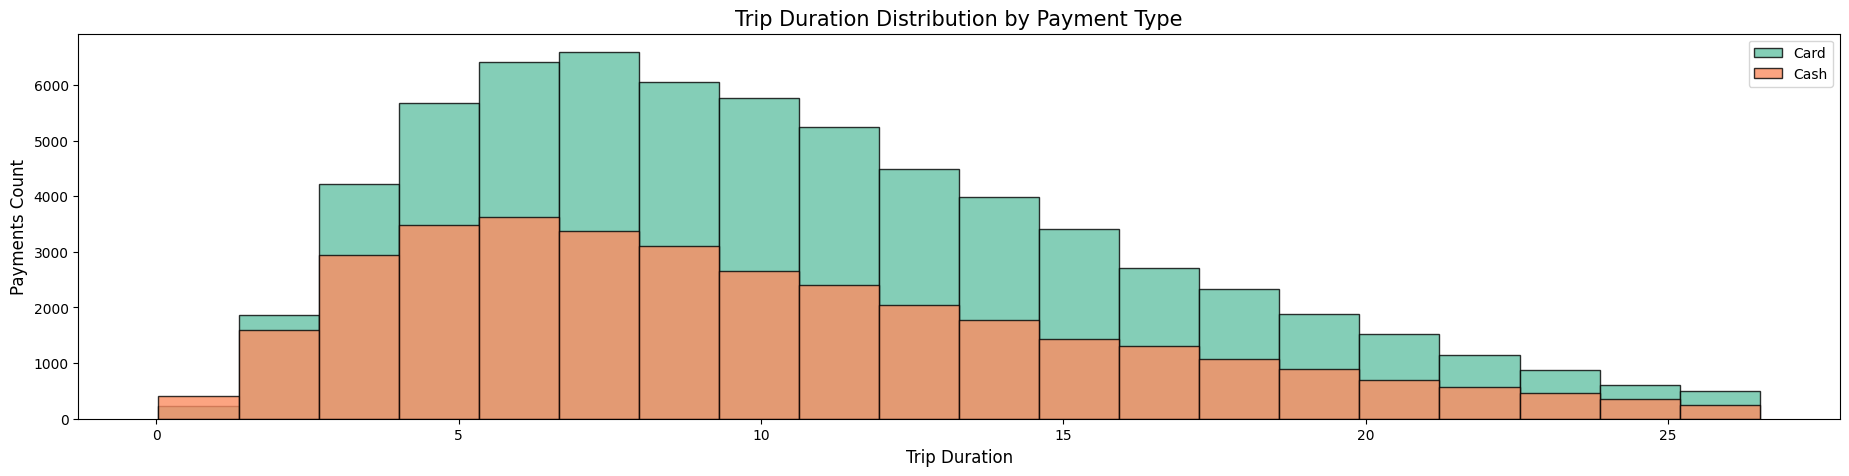

In [19]:
plt.figure(figsize=(50,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain')

plt.hist(sample_df[sample_df['payment_type']=='Card']['duration'], histtype='barstacked',bins=20,color=card_color,alpha=0.8,edgecolor='black',label='Card')
plt.hist(sample_df[sample_df['payment_type']=='Cash']['duration'], histtype='barstacked',bins=20,color=cash_color,alpha=0.8,edgecolor='black',label='Cash')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Trip Duration', fontsize=12)
plt.ylabel('Payments Count', fontsize=12)
plt.title('Trip Duration Distribution by Payment Type', fontsize=15)
plt.legend()
plt.show()

In [20]:
#round(df_main['payment_type'].value_counts()/df_main.shape[0]*100,2)
#df_main['payment_type'].value_counts().index

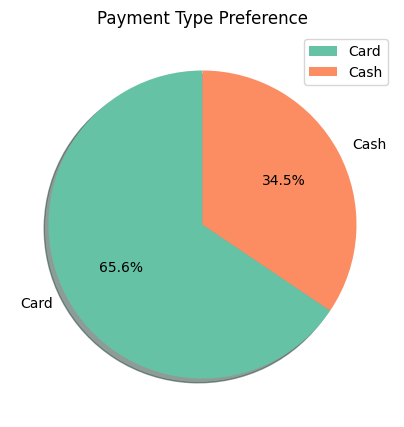

In [21]:
plt.figure(figsize=(5,5))
plt.title('Payment Type Preference')
plt.pie(round(sample_df['payment_type'].value_counts()/sample_df.shape[0]*100, 2), 
        labels=sample_df['payment_type'].value_counts().index,
        autopct='%1.1f%%', startangle=90, shadow=True, colors=[card_color,cash_color])
plt.legend()
plt.show()

In [22]:
bar = sample_df.groupby(['payment_type','passenger_count'])[['passenger_count']].count().rename(columns={'passenger_count':'count'}).reset_index()
bar['perc'] = bar['count']/bar['count'].sum()*100
bar

,payment_type,passenger_count,count,perc
0,Card,1,47223,47.22300
1,Card,2,9035,9.03500
2,Card,3,2498,2.49800
3,Card,4,1134,1.13400
4,Card,5,3507,3.50700
5,Card,6,2155,2.15500
6,Cash,1,24029,24.02900
7,Cash,2,5118,5.11800
8,Cash,3,1518,1.51800
9,Cash,4,757,0.75700


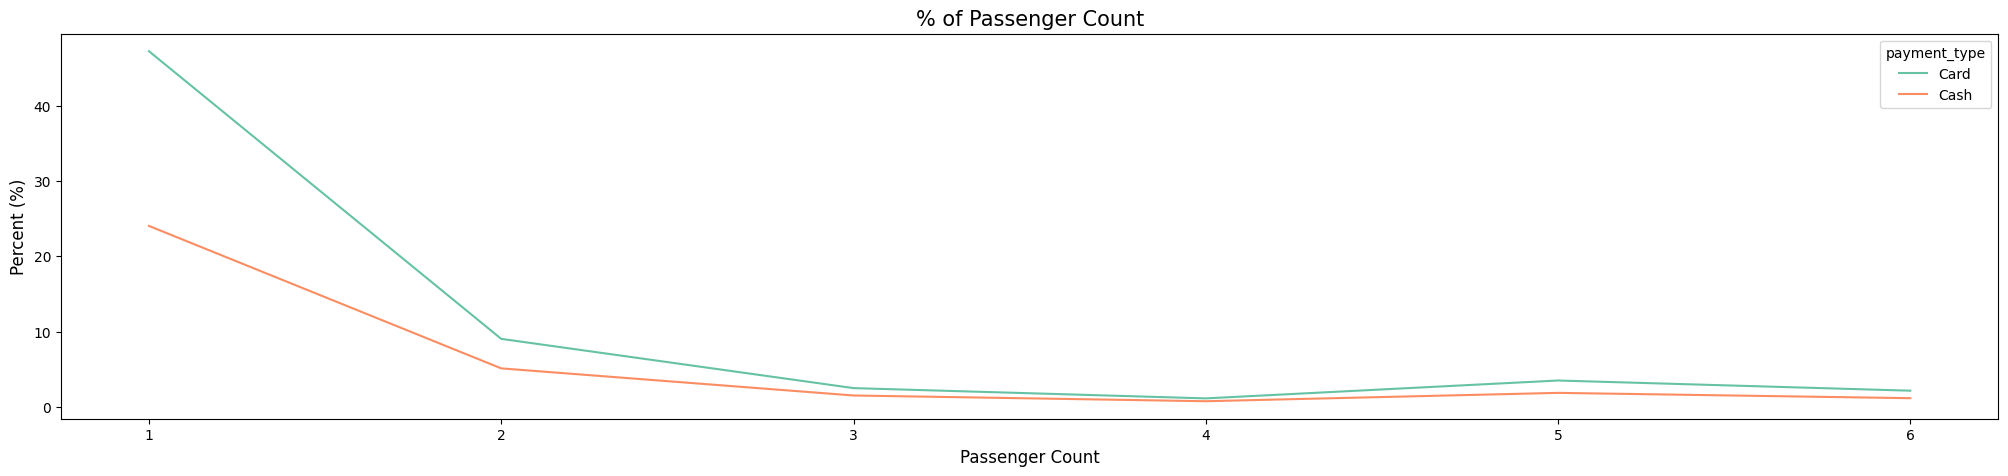

In [23]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(data=bar, x="passenger_count", y="perc", hue="payment_type", palette="Set2")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Percent (%)', fontsize=12)
plt.title('% of Passenger Count', fontsize=15)
#plt.legend(fontsize=10)
plt.show()

In [24]:
bar=bar.pivot_table(values='perc', index = 'payment_type', columns= 'passenger_count').fillna(0).reset_index()
bar

passenger_count,payment_type,1,2,3,4,5,6
0,Card,47.22300,9.03500,2.49800,1.13400,3.50700,2.15500
1,Cash,24.02900,5.11800,1.51800,0.75700,1.86600,1.16000


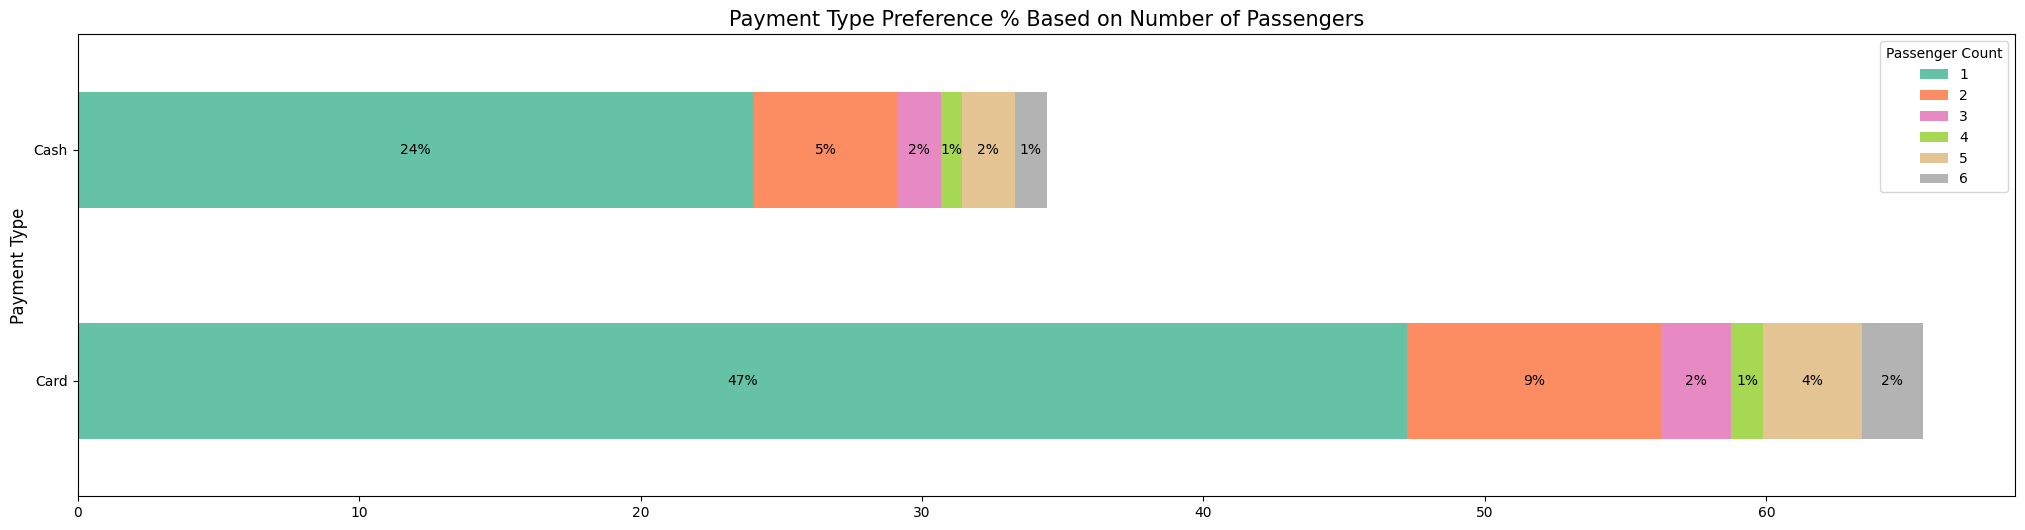

In [25]:
fig,ax = plt.subplots(figsize=(25,6))
bar.plot(x='payment_type', kind='barh',stacked=True,ax=ax,colormap="Set2")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('Payment Type', fontsize=12)
plt.title('Payment Type Preference % Based on Number of Passengers', fontsize=15)
plt.legend(title = 'Passenger Count', fontsize=10)
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.0f}%'.format(width),horizontalalignment='center',verticalalignment='center')

In [26]:
del bar,corr_matrix

### Hypothesis Testing

In [27]:
import scipy.stats as st
import statsmodels.api as sm

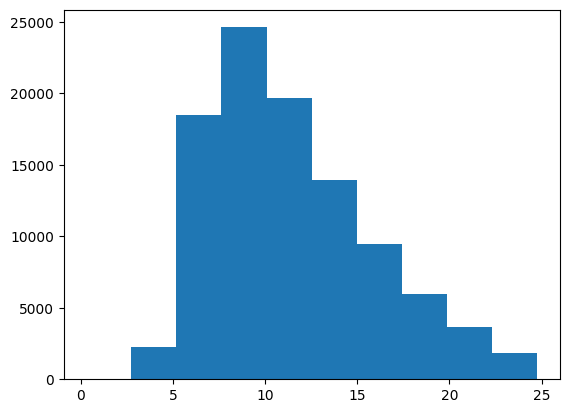

In [28]:
plt.ticklabel_format(style='plain')
plt.hist(sample_df['total_amount'])
plt.show()

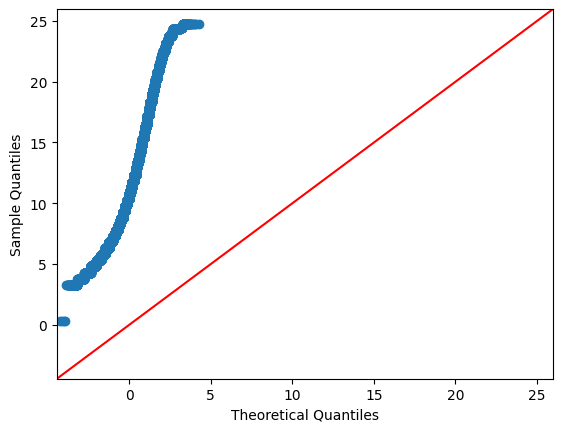

In [29]:
sm.qqplot(sample_df['total_amount'],line='45')
plt.show()

In [30]:
card_sample = sample_df[sample_df['payment_type']=='Card']['total_amount']
cash_sample = sample_df[sample_df['payment_type']=='Cash']['total_amount']

In [31]:
t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T-Statistc', t_stats, 'p-value', p_value)

T-Statistc 89.12552322913135 p-value 0.0


In [32]:
del card_sample,cash_sample

### Regression Model

In [33]:
#!pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor

In [34]:
#df_model=pd.read_csv('Dataset//2016Q1ModellingData.csv')
df_model = sample_df.copy()
#del df_main
df_model.shape
# (29002628, 7)

(100000, 7)

In [35]:
df_model.reset_index(drop=True, inplace=True)
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   passenger_count   100000 non-null  int64  
 1   trip_distance     100000 non-null  float64
 2   payment_type      100000 non-null  object 
 3   pickup_latitude   100000 non-null  float64
 4   pickup_longitude  100000 non-null  float64
 5   total_amount      100000 non-null  float64
 6   duration          100000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.3+ MB


In [36]:
df_model['payment_type'] = df_model['payment_type'].replace(['Card','Cash'],[1,2])

In [37]:
X = df_model[['trip_distance','duration','payment_type']]
y = df_model[['total_amount']]

print(X.shape,y.shape)

(100000, 3) (100000, 1)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75000, 3) (25000, 3) (75000, 1) (25000, 1)


In [39]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
#     "Support Vector Regressor": SVR(kernel='linear'),
#     "Cat Boost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)
# }

In [40]:
# results = []
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on test data
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Store results
#     results.append({
#         "Model": name,
#         "MSE": mse,
#         "R²": r2
#     })

# # Convert results to a DataFrame
# results_df = pd.DataFrame(results)
# results_df

In [41]:
# plt.figure(figsize=(5, 2.5))
# plt.barh(results_df['Model'], results_df['MSE'], color='skyblue')
# plt.xlabel('MSE Score')
# plt.title('Comparison of Regression Models')
# plt.show()

In [42]:
# model = CatBoostRegressor(iterations=50, learning_rate=0.1, depth=5, verbose=1)
# model.fit(X_train, y_train)
    
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [43]:
import lightgbm as lgb

In [44]:
model = lgb.LGBMRegressor(
    max_depth=10,
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    #early_stopping_rounds=50,
    #verbose=10
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 3
[LightGBM] [Info] Start training from score 11.494170


LGBMRegressor(colsample_bytree=0.8, max_depth=10, n_jobs=-1, subsample=0.8)

In [45]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7052781732882577
R-squared: 0.9637049529607166


In [46]:
y_test['preds_cat'] = y_pred
y_test

,total_amount,preds_cat
75721,9.30000,9.73769
80184,17.85000,16.46983
19864,17.80000,19.85388
76699,14.15000,14.47431
92991,8.80000,8.74161
...,...,...
21271,12.35000,12.02088
34014,5.80000,5.84189
81355,10.80000,10.89328
65720,6.80000,6.14763


In [47]:
df_output = pd.merge(X,y,how = 'left',left_index = True, right_index = True)

pred = model.predict(X)
y['predicted'] = pred

df_output = pd.merge(df_output,y[['predicted']],how = 'left',left_index = True, right_index = True)

df_output['diff'] = abs(df_output['total_amount']-df_output['predicted'])

In [48]:
df_output['diff'][(df_output['diff'].where(df_output['diff']<1).notnull())].shape[0]/df_output.shape[0]*100

83.943

In [49]:
df_output[df_output['diff'].where(df_output['diff']<1).notnull()]

,trip_distance,duration,payment_type,total_amount,predicted,diff
0,5.70000,12.18333,2,18.80000,18.72577,0.07423
2,3.19000,20.18333,1,19.56000,19.04964,0.51036
3,1.20000,6.35000,2,7.80000,7.59476,0.20524
4,1.04000,4.91667,1,7.56000,8.15352,0.59352
5,5.41000,18.41667,1,23.16000,22.61785,0.54215
...,...,...,...,...,...,...
99993,2.10000,5.81667,2,9.30000,8.85815,0.44185
99995,1.00000,4.93333,1,8.75000,8.15352,0.59648
99996,1.75000,7.56667,1,11.16000,10.58971,0.57029
99997,1.00000,6.31667,1,8.30000,8.80305,0.50305


In [50]:
del X,X_test,X_train,y,y_test,y_train

In [51]:
%whos DataFrame

Variable               Type         Data/Info
---------------------------------------------
df_main                DataFrame              passenger_count<...>9002628 rows x 7 columns]
df_model               DataFrame           passenger_count  t<...>[100000 rows x 7 columns]
df_output              DataFrame           trip_distance  dur<...>[100000 rows x 6 columns]
sample_df              DataFrame              passenger_count<...>[100000 rows x 7 columns]
selected_corr_matrix   DataFrame                     total_am<...>titude          1.00000  
selected_features      DataFrame              total_amount  d<...>[100000 rows x 5 columns]
